# 📝 Exercise M7.01

This notebook aims at **building baseline classifiers**, which we use to
compare our predictive model with. Besides, we check the differences with
the baselines that we saw in regression.

We use the **adult census dataset**, using **only the numerical features**.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

In [2]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


In [3]:
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

First, define a **`ShuffleSplit` cross-validation strategy** setting **half of the
sample as a test set** in each round.

In [4]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.5, random_state=42)

Next, create a **machine learning pipeline** composed of a transformer to
**standardize the data** followed by a **logistic regression**.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

modelp = make_pipeline(StandardScaler(), LogisticRegression())

**Compute the test score** by using the model, the data, and the cross-validation
strategy that you defined above.

In [6]:
from sklearn.model_selection import cross_val_score

scorel = cross_val_score(modelp, data, target, cv=cv)
scorel

array([0.81417632, 0.81434012, 0.81704271, 0.81499529, 0.81384874,
       0.81319356, 0.81520003, 0.81581426, 0.81462676, 0.81290692,
       0.81384874, 0.80946726, 0.81372589, 0.81126899, 0.81425822,
       0.81380779, 0.81425822, 0.81040907, 0.81622374, 0.81307072,
       0.81225175, 0.81253839, 0.81147373, 0.81446296, 0.80795217,
       0.81065476, 0.81487245, 0.81421727, 0.81495434, 0.81597805])

Using the **`sklearn.model_selection.permutation_test_score`** function,
**check the chance level** of the previous model.

In [7]:
from sklearn.model_selection import permutation_test_score

scorep, perm_score, pvalue = permutation_test_score(modelp, data, target, cv=cv, n_permutations=30)
perm_score

array([0.76036608, 0.76110315, 0.76139115, 0.76020501, 0.76050667,
       0.76094891, 0.76054625, 0.760953  , 0.76052578, 0.7611127 ,
       0.76097894, 0.76071141, 0.76124101, 0.76096665, 0.76090933,
       0.76026507, 0.76037836, 0.76067319, 0.76095983, 0.76065954,
       0.76072642, 0.7603729 , 0.76025142, 0.76039884, 0.76079194,
       0.76101716, 0.76046299, 0.76059129, 0.76022549, 0.76031012])

Finally, compute the test score of a **dummy classifier** which would predict
the most frequent class from the training set. You can look at the
`sklearn.dummy.DummyClassifier` class.

In [8]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
scored = cross_val_score(dummy, data, target, cv=cv)
scored

array([0.76290897, 0.75922362, 0.76319561, 0.7597969 , 0.75807706,
       0.76094345, 0.76303182, 0.76454691, 0.76057492, 0.75815896,
       0.76303182, 0.75914172, 0.76278613, 0.75631629, 0.76020638,
       0.76028828, 0.75987879, 0.75951026, 0.75951026, 0.76028828,
       0.76303182, 0.76045207, 0.75688956, 0.76086155, 0.75357274,
       0.75754474, 0.76237664, 0.76065681, 0.76077966, 0.7609844 ])

Now that we collected the scores from the baselines and the model, **plot
the distributions of the different test scores**.

We concatenate the different test scores in the same pandas dataframe.

In [9]:
scores = pd.DataFrame({'perm': perm_score, 'dummy': scored, 'logistic': scorel})
scores

,perm,dummy,logistic
0,0.760366,0.762909,0.814176
1,0.761103,0.759224,0.814340
2,0.761391,0.763196,0.817043
3,0.760205,0.759797,0.814995
4,0.760507,0.758077,0.813849
5,0.760949,0.760943,0.813194
6,0.760546,0.763032,0.815200
7,0.760953,0.764547,0.815814
8,0.760526,0.760575,0.814627
9,0.761113,0.758159,0.812907


Next, plot the distributions of the test scores.

<AxesSubplot:ylabel='Frequency'>

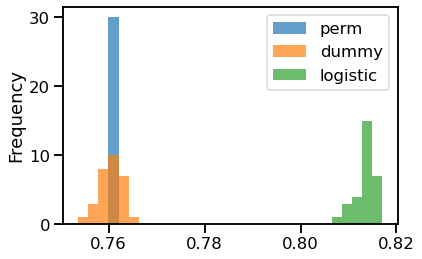

In [10]:
scores.plot.hist(bins=30, alpha=.7)

Change the strategy of the **dummy classifier** to **`stratified`**, compute the
scores (accuracies) and plot the distribution of the scores together with the other results. Explain why the **accuracy gets worse**.

In [11]:
dummystrat = DummyClassifier(strategy='stratified')
scoress = cross_val_score(dummystrat, data, target, cv=cv)
scoress

array([0.63138283, 0.63478154, 0.63510913, 0.6370337 , 0.6432169 ,
       0.63646042, 0.63723844, 0.63400352, 0.63916302, 0.63265223,
       0.63474059, 0.63445395, 0.63519102, 0.64112854, 0.63682896,
       0.63818025, 0.63269317, 0.63723844, 0.63801646, 0.63318455,
       0.63732034, 0.63662422, 0.6345768 , 0.63785267, 0.63060481,
       0.63658327, 0.63228369, 0.63797551, 0.63633758, 0.63985914])

In [12]:
scores['dummystrat'] = scoress

In [13]:
scores

,perm,dummy,logistic,dummystrat
0,0.760366,0.762909,0.814176,0.631383
1,0.761103,0.759224,0.814340,0.634782
2,0.761391,0.763196,0.817043,0.635109
3,0.760205,0.759797,0.814995,0.637034
4,0.760507,0.758077,0.813849,0.643217
5,0.760949,0.760943,0.813194,0.636460
6,0.760546,0.763032,0.815200,0.637238
7,0.760953,0.764547,0.815814,0.634004
8,0.760526,0.760575,0.814627,0.639163
9,0.761113,0.758159,0.812907,0.632652


<AxesSubplot:ylabel='Frequency'>

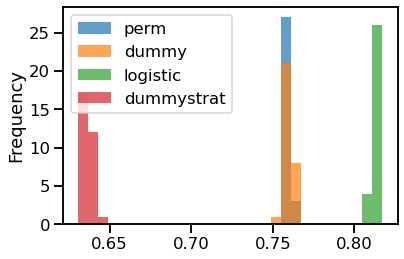

In [14]:
scores.plot.hist(bins=30, alpha=0.7)

<AxesSubplot:>

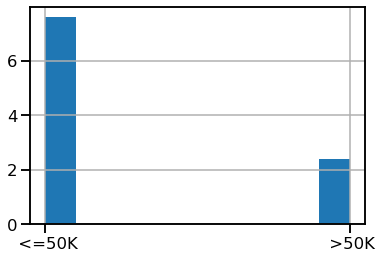

In [22]:
target.hist(density=True)

**Explanation**: When the `strategy` is set to most_frequent, the accuracy is around 76% since all the predicted class is always the most frequent class, i.e. <=50K. When the `strategy` is changed to **stratified**, the **`DummyClassifier` predicts a class randomly but adhering to class distribution**: 76% and 24% which **makes the accuracy even worse**.